In [11]:
import pandas as pd

df = pd.read_csv('homepage_actions.csv')
df.head(10)

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
5,2016-09-24 20:32:25.712659,681598,experiment,view
6,2016-09-24 20:39:03.248853,522116,experiment,view
7,2016-09-24 20:57:20.336757,349125,experiment,view
8,2016-09-24 20:58:01.948663,349125,experiment,click
9,2016-09-24 21:00:12.278374,560027,control,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [2]:
# total number of actions
df['action'].shape[0]

8188

In [4]:
# number of unique users
df['id'].nunique()

6328

In [7]:
# size of control group and experiment group
df[df['group'] == "control"].shape[0]

4264

In [9]:
df['group'].value_counts()

control       4264
experiment    3924
Name: group, dtype: int64

In [10]:
df['action'].value_counts()

view     6328
click    1860
Name: action, dtype: int64

### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [12]:
# duration of this experiment
df.timestamp.max(), df.timestamp.min()

('2017-01-18 10:24:08.629327', '2016-09-24 17:42:27.839496')

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [14]:
# action types in this experiment
df['action'].value_counts()

view     6328
click    1860
Name: action, dtype: int64

### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

Answer

- A ratio showing how often people who see your ad or free product listing end up clicking it. Clickthrough rate (CTR) can be used to gauge how well your keywords and ads, and free listings, are performing.

### 5. Define the click through rate (CTR) for this experiment.

Answer

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: $$
$$H_1: $$

In [29]:
control_df = df.query('group == "control"')
experiment_df = df.query('group == "experiment"')

In [31]:
control_df.id.nunique()

3332

In [32]:
experiment_df.id.nunique()

2996

In [17]:
ctr_control = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
ctr_experiment = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()


In [18]:
print("Control CTR = ",ctr_control)
print("Experiment CTR = ",ctr_experiment)

Control CTR =  0.2797118847539016
Experiment CTR =  0.3097463284379172


In [19]:
obs_diff = ctr_experiment - ctr_control

In [20]:
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0],replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    ctr_control = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    ctr_experiment = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(ctr_experiment - ctr_control)
    

(array([   26.,   184.,   855.,  2146.,  3003.,  2320.,  1142.,   290.,
           30.,     4.]),
 array([-0.01169692, -0.00258117,  0.00653459,  0.01565035,  0.0247661 ,
         0.03388186,  0.04299762,  0.05211338,  0.06122913,  0.07034489,
         0.07946065]),
 <a list of 10 Patch objects>)

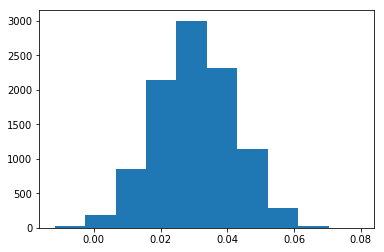

In [23]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.hist(diffs)

In [24]:
import numpy as np
diffs = np.array(diffs)
null_vals = np.random.normal(0,diffs.std(),diffs.size)

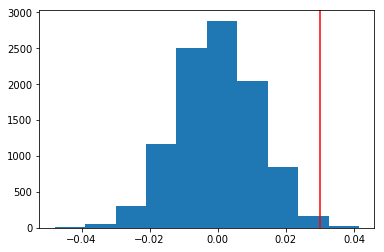

In [27]:
plt.hist(null_vals)
plt.axvline(x = obs_diff , color = "red")

In [28]:
(null_vals > obs_diff).mean()

0.0047999999999999996